# Data mining project about social media trends
### By Mateusz Rokita, Jakub Kwiatkowski and Krzysztof Szudy

This dataset offers a comprehensive overview of viral social media trends across TikTok, Instagram, Twitter, and YouTube. It includes detailed information on popular hashtags, content formats, and user engagement metrics, enabling in-depth analysis of how digital trends evolve across platforms. With the inclusion of regional activity and influencer-generated content, this dataset is particularly well-suited for:

- Trend detection and forecasting

- Sentiment analysis and modeling

- Research on influencer marketing and digital communication strategies

In [1]:
import kagglehub

path = kagglehub.dataset_download("atharvasoundankar/viral-social-media-trends-and-engagement-analysis")

print("Path to dataset files:", path)


c:\Users\kobaa\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 105k/105k [00:00<00:00, 355kB/s]

Extracting files...
Path to dataset files: C:\Users\kobaa\.cache\kagglehub\datasets\atharvasoundankar\viral-social-media-trends-and-engagement-analysis\versions\1


In [2]:
import pandas as pd

path_file = path + "\\Viral_Social_Media_Trends.csv"

data = pd.read_csv(path_file)

data.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


Let's perform some data cleaning 

In [ ]:
# N/As dropping 
data.dropna(axis=1, how='all', inplace=True)
data.dropna(axis=0, how='any', inplace=True)
data.columns = data.columns.str.strip()

Alright, after cleaning the data we are able to intially visualize the data and its' distributions to see some trends, how everything is distributed and have a good starting point for next ideas. 

C:\Users\kobaa\AppData\Local\Temp\ipykernel_15332\965710140.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Platform', palette=platform_colors)


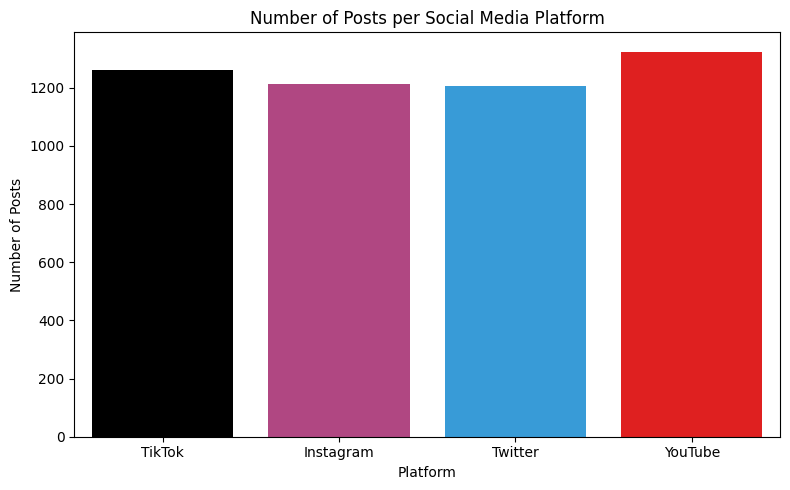

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

platform_colors = {
    'YouTube': '#FF0000',
    'Twitter': '#1DA1F2',
    'TikTok': '#000000',
    'Instagram': '#C13584'
}

engagement_colors = {
    'High': '#2ca02c',
    'Medium': '#ff7f0e',
    'Low': '#d62728'
}

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Platform', palette=platform_colors)
plt.title('Number of Posts per Social Media Platform')
plt.ylabel('Number of Posts')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()



Now we finally see where the most posts from our data source come from, the first interesting thing to think about is the distribution of likes, which somehow correspond to the popularity of each app since the engagement of users.

C:\Users\kobaa\AppData\Local\Temp\ipykernel_15332\1204289659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Platform', y='Likes', estimator='mean', palette=platform_colors)


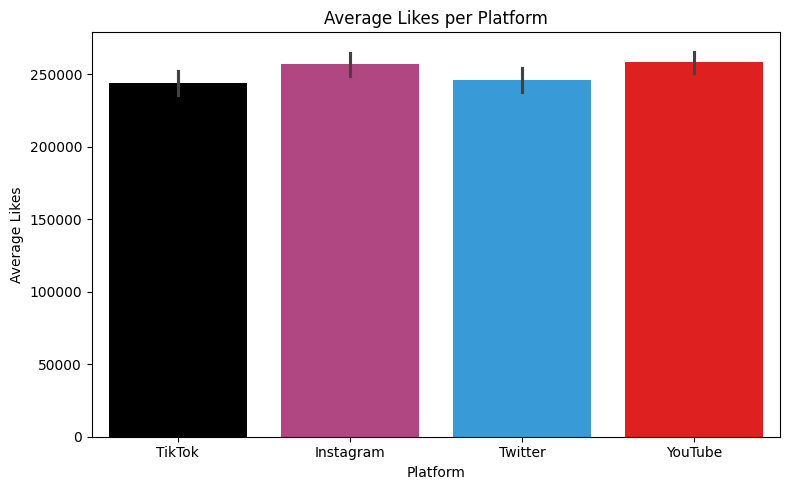

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Platform', y='Likes', estimator='mean', palette=platform_colors)
plt.title('Average Likes per Platform')
plt.ylabel('Average Likes')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()


Now, we see that YouTube and Instagram have the most engaged community... how does it look across different regions of the world? Which region is the most engaged?

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', hue='Engagement_Level', palette=engagement_colors)
plt.title('Engagement Levels by Region')
plt.ylabel('Number of Posts')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
